In [179]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
from pathlib import Path
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyprojroot import here

from knapsack import KnapsackGA
from knapsack.items import items

# Knapsack problem

In [181]:
ga = KnapsackGA(items, max_weight=15, population_size=50)
print(ga)

KnapsackGA(num_items=37, max_weight=15, population_size=50, crossover_rate=0.80, mutation_rate=0.10, elitism_rate=0.10)


In [182]:
solution, value, history = ga.run(generations=50)
print(f"{solution=}\n{value=}")

solution=[Item(name='Sonic Screwdriver', value=78, weight=0.3), Item(name='Portal Gun', value=92, weight=1.8), Item(name='Babel Fish', value=99, weight=0.01), Item(name="Hitchhiker's Guide to the Galaxy", value=99, weight=0.9), Item(name='One Ring', value=98, weight=0.1), Item(name='Stark Arc Reactor', value=70, weight=0.9), Item(name='Elder Wand', value=94, weight=0.3), Item(name='Lightspeed Travel Manual', value=65, weight=1.3), Item(name="Batman's Utility Belt", value=85, weight=1.0), Item(name='Phaser', value=79, weight=0.8), Item(name='Witcher Medallion', value=60, weight=0.2), Item(name='Omnitrix', value=91, weight=0.5), Item(name='Gryphon Feather Cloak', value=87, weight=0.6), Item(name='Turbo-Encabulator', value=97, weight=2.3), Item(name='Phase-Inverted Logic Coupler', value=75, weight=1.2), Item(name='Point-of-Sale Kardashev Transmuter', value=93, weight=0.9), Item(name='Neutrino Soap Dispenser', value=68, weight=0.4), Item(name='Four-Dimensional Coffee Filter', value=81, wei

These are the items that made the cut:

In [188]:
print("\n".join([i.name for i in solution]))

Sonic Screwdriver
Portal Gun
Babel Fish
Hitchhiker's Guide to the Galaxy
One Ring
Stark Arc Reactor
Elder Wand
Lightspeed Travel Manual
Batman's Utility Belt
Phaser
Witcher Medallion
Omnitrix
Gryphon Feather Cloak
Turbo-Encabulator
Phase-Inverted Logic Coupler
Point-of-Sale Kardashev Transmuter
Neutrino Soap Dispenser
Four-Dimensional Coffee Filter
Multi-phase Heisenberg Compensator
Non-Euclidean Mousepad


## Visualisations

In [183]:
data = pd.DataFrame(history, columns=["generation", "best_fitness", "avg_fitness"])
data.head()

,generation,best_fitness,avg_fitness
0,0,0,0.00
1,1,0,0.00
2,2,0,0.00
3,3,987,19.74
4,4,1073,76.42


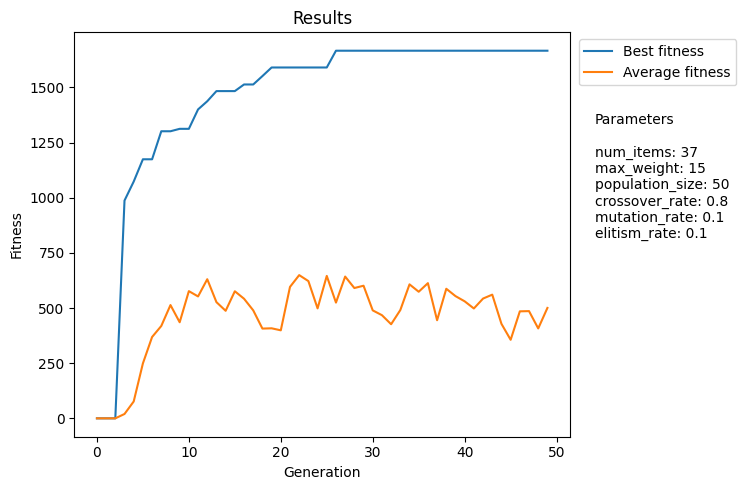

In [184]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data, x="generation", y="best_fitness", ax=ax, label="Best fitness")
sns.lineplot(data, x="generation", y="avg_fitness", ax=ax, label="Average fitness")

ax.set(title="Results", xlabel="Generation", ylabel="Fitness")
ax.legend(loc="upper right", bbox_to_anchor=(1.35, 1))

params = ga.params()
param_text = "Parameters\n\n" + "\n".join(f"{k}: {v}" for k, v in params.items())
ax.text(1.05, 0.8, param_text, transform=ax.transAxes, fontsize=10, verticalalignment='top')
fig.tight_layout()

In [185]:
# Create figures/ directory if it doesn't exist
figures_dir = here("figures")
figures_dir.mkdir(parents=True, exist_ok=True)

# Create timestamped filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = figures_dir / f"ga_results_{timestamp}.png"

# Save the figure
fig.savefig(filename, bbox_inches="tight")